<h2 style='color:purple' align='center'>Naive Bayes Tutorial Part 1: Predicting survival from titanic crash</h2>

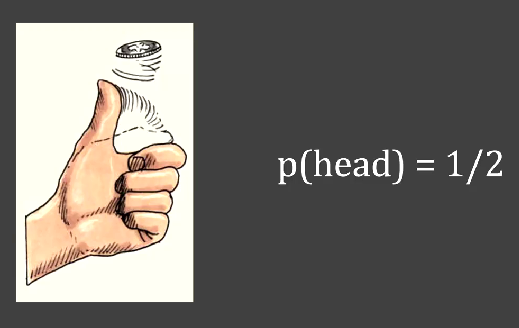

# Conditional Probability
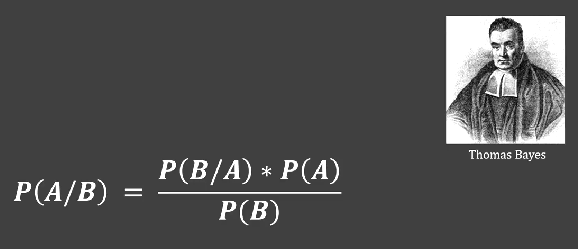

<div style='text-align:justify'><b>Consider the example to know the essence of conditional probability, a fair die is rolled, the probability that it shows “4” is 1/6, it is an unconditional probability, but the probability that it shows “4” with the condition that it comes with even number, is 1/3, this is a conditional probability.</div></b>

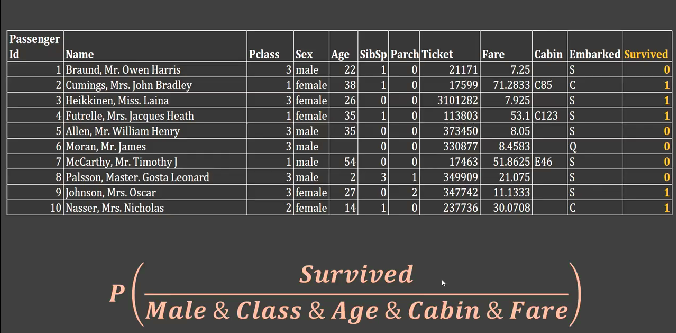

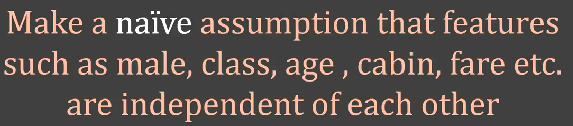

## Some applications of Nayive Base:
1. Email Spam Detection
2. Hand Digit Recognition
3. Wheather Prediction
4. Face Detection
5. News Article Categorization
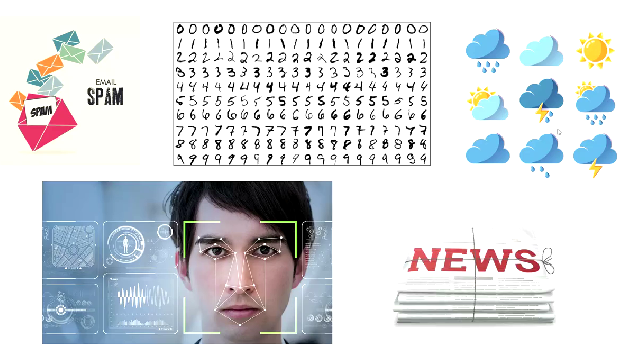

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/Data_Science/My Github/Machine-Learning-with-Python/14. naive_bayes/1. naive_bayes_titanic_survival_prediction/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [4]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [5]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [6]:
#append dummy variables into dataframes 
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


**Drop Sex column**

In [7]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [8]:
#Check if any nan value exist
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
#Fill NAN value with mean value
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [13]:
len(X_train)

712

In [14]:
len(X_test)

179

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [16]:
model.fit(X_train,y_train)

GaussianNB()

In [17]:
model.score(X_test,y_test)

0.8324022346368715

In [18]:
X_test[0:10]

,Pclass,Age,Fare,female,male
745,1,70.000000,71.0000,0,1
483,3,63.000000,9.5875,1,0
632,1,32.000000,30.5000,0,1
273,1,37.000000,29.7000,0,1
499,3,24.000000,7.7958,0,1
55,1,29.699118,35.5000,0,1
463,2,48.000000,13.0000,0,1
202,3,34.000000,6.4958,0,1
761,3,41.000000,7.1250,0,1
465,3,38.000000,7.0500,0,1


In [19]:
y_test[0:10]

745    0
483    1
632    1
273    0
499    0
55     1
463    0
202    0
761    0
465    0
Name: Survived, dtype: int64

In [20]:
model.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
model.predict_proba(X_test[:10])

array([[0.74309074, 0.25690926],
       [0.06610057, 0.93389943],
       [0.91881393, 0.08118607],
       [0.92167558, 0.07832442],
       [0.98684943, 0.01315057],
       [0.91244306, 0.08755694],
       [0.9759533 , 0.0240467 ],
       [0.98817594, 0.01182406],
       [0.98848654, 0.01151346],
       [0.9884357 , 0.0115643 ]])

**0.74= not survived   0.25=survived**

**Calculate the score using cross validation**

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.74825175, 0.72027972, 0.78873239, 0.82394366, 0.76056338])

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-10-13    |   <font color=blue>**Ehsan Zia**</font>  |  |  |